### TADA
- Data Prepare (metric)

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

A_metrics = pd.read_csv("/home/sein/mk_config/ycsb_AA/results/external_metrics.csv")

In [3]:
A_metrics = pd.read_csv("/home/sein/mk_config/ycsb_AA/results/external_metrics.csv")

metrics = A_metrics.drop(['Unnamed: 0'], axis = 1)

metrics = metrics.replace([np.inf],9999999)


metrics

,tps,latency
0,0.216666,20847397
1,0.322221,12744942
2,3789.313102,1076
3,0.166667,12510551
4,0.266666,10686198
...,...,...
995,0.138889,11836756
996,0.149999,16386967
997,0.227778,19293708
998,0.188888,10529195


- Data Prepare (config)

In [4]:
import random
import glob
import os
import sys
import pandas as pd

knob_list = glob.glob("/home/sein/mk_config/ycsb_AA/configs/my_*.cnf")


In [5]:
cnt = 0

for xx in range(len(knob_list)):
    path = "/home/sein/mk_config/ycsb_AA/configs/my_{}.cnf".format(xx)
    # knob_list = glob.glob("/home/sein/2023_EDBT/KCC_tpcc_dataset/my_*.cnf")
    a_all = pd.read_csv(path, sep="=", names=['Sample', 'value'], header=2)
    a_all = a_all.set_index("Sample")
    cur_all_df = a_all.T
    
    if cnt == 0:
        A_config = cur_all_df
    else :
        A_config = pd.concat([A_config, cur_all_df], axis=0)
    cnt += 1
A_config = A_config.reset_index()
A_config = A_config.drop(["index"],axis=1)
A_config = A_config.drop(A_config.columns[[0,1]], axis=1)


A_config

Sample,automatic_sp_privileges,back_log,binlog_cache_size,binlog_group_commit_sync_delay,binlog_group_commit_sync_no_delay_count,binlog_rows_query_log_events,binlog_stmt_cache_size,bulk_insert_buffer_size,default_week_format,div_precision_increment,...,stored_program_cache,sync_binlog,table_definition_cache,table_open_cache,table_open_cache_instances,thread_cache_size,tmp_table_size,transaction_alloc_block_size,transaction_prealloc_size,updatable_views_with_limit
0,1,24000,7700480,485000,352000,0,655360,356515840,7,1,...,489472,200000,13200,4000,18,11520,255852544,28672,94208,0
1,0,15000,622592,140000,701000,1,2637824,595591168,5,8,...,374528,50000,91600,4000,17,15360,402653184,110592,71680,1
2,1,8000,7110656,440000,801000,1,8093696,570425344,4,4,...,37120,660000,15600,1,9,1024,851443712,8192,122880,0
3,0,34000,8519680,760000,303000,0,10420224,343932928,3,4,...,427776,430000,11200,10000,9,13568,163577856,16384,83968,0
4,0,12000,6291456,380000,630000,1,5472256,243269632,1,13,...,388096,880000,11600,4000,25,1536,348127232,126976,57344,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,18000,4276224,945000,610000,1,4096000,432013312,0,29,...,159744,520000,91200,8000,63,7680,163577856,57344,104448,1
996,1,57000,5636096,245000,211000,1,8716288,268435456,1,24,...,455936,940000,89600,2000,29,11520,230686720,69632,61440,0
997,1,2000,622592,45000,537000,1,393216,671088640,7,20,...,308480,810000,66000,8000,48,12544,536870912,81920,108544,1
998,0,38000,5505024,700000,598000,0,9125888,834666496,3,17,...,404992,260000,70400,2000,57,3840,218103808,36864,63488,1


- all_samples = config + metrics (1000 x 140) => AutoEncoder's input : Config + Metrics

In [6]:
all_samples = pd.concat([A_config,metrics], axis=1)

all_samples

,automatic_sp_privileges,back_log,binlog_cache_size,binlog_group_commit_sync_delay,binlog_group_commit_sync_no_delay_count,binlog_rows_query_log_events,binlog_stmt_cache_size,bulk_insert_buffer_size,default_week_format,div_precision_increment,...,table_definition_cache,table_open_cache,table_open_cache_instances,thread_cache_size,tmp_table_size,transaction_alloc_block_size,transaction_prealloc_size,updatable_views_with_limit,tps,latency
0,1,24000,7700480,485000,352000,0,655360,356515840,7,1,...,13200,4000,18,11520,255852544,28672,94208,0,0.216666,20847397
1,0,15000,622592,140000,701000,1,2637824,595591168,5,8,...,91600,4000,17,15360,402653184,110592,71680,1,0.322221,12744942
2,1,8000,7110656,440000,801000,1,8093696,570425344,4,4,...,15600,1,9,1024,851443712,8192,122880,0,3789.313102,1076
3,0,34000,8519680,760000,303000,0,10420224,343932928,3,4,...,11200,10000,9,13568,163577856,16384,83968,0,0.166667,12510551
4,0,12000,6291456,380000,630000,1,5472256,243269632,1,13,...,11600,4000,25,1536,348127232,126976,57344,0,0.266666,10686198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,18000,4276224,945000,610000,1,4096000,432013312,0,29,...,91200,8000,63,7680,163577856,57344,104448,1,0.138889,11836756
996,1,57000,5636096,245000,211000,1,8716288,268435456,1,24,...,89600,2000,29,11520,230686720,69632,61440,0,0.149999,16386967
997,1,2000,622592,45000,537000,1,393216,671088640,7,20,...,66000,8000,48,12544,536870912,81920,108544,1,0.227778,19293708
998,0,38000,5505024,700000,598000,0,9125888,834666496,3,17,...,70400,2000,57,3840,218103808,36864,63488,1,0.188888,10529195


In [7]:
discrete_columns = [all_samples.columns[0], all_samples.columns[5],all_samples.columns[10],all_samples.columns[13],
                    all_samples.columns[17],all_samples.columns[24],all_samples.columns[30],all_samples.columns[31],
                    all_samples.columns[32],all_samples.columns[34],all_samples.columns[36],all_samples.columns[37],
                    all_samples.columns[58],all_samples.columns[60],all_samples.columns[64],all_samples.columns[68],
                    all_samples.columns[72],all_samples.columns[73],all_samples.columns[74],all_samples.columns[75],
                    all_samples.columns[77],all_samples.columns[80],all_samples.columns[82],all_samples.columns[83],
                    all_samples.columns[90],all_samples.columns[91],all_samples.columns[92],all_samples.columns[93],
                    all_samples.columns[118],all_samples.columns[123],all_samples.columns[124],all_samples.columns[125],
                    all_samples.columns[126]]

### continuous 열 정리
all_columns = all_samples.columns
continuous_columns = all_columns.drop(discrete_columns)

In [8]:
for i in range(len(discrete_columns)):
    a = discrete_columns[i]
    all_samples = all_samples.astype({a:'int'})

In [9]:
for i in range(len(continuous_columns)):
    a = continuous_columns[i]
    all_samples = all_samples.astype({a:'float'})

### config - metric prediction (with raw data #1000)

In [14]:
### TabNet
from pytorch_tabnet.tab_model import TabNetRegressor
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import torch
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

X_all = np.array(A_config)
Y_all = np.array(metrics)

X_train, X_test, y_train, y_test = train_test_split(X_all,Y_all,test_size=0.2, shuffle=True)

y_train_tps = y_train[:,0][:, np.newaxis]
y_train_latency = y_train[:,1][:, np.newaxis]
y_test_tps = y_test[:,0][:, np.newaxis]
y_test_latency = y_test[:,1][:, np.newaxis]
 
X_scaler = MinMaxScaler().fit(X_train)
Y_scaler_tps  = StandardScaler().fit(y_train_tps)
Y_scaler_latecy = StandardScaler().fit(y_train_latency)

scaled_X_train = X_scaler.transform(X_train)
scaled_X_test = X_scaler.transform(X_test)

scaled_y_train_tps = Y_scaler_tps.transform(y_train_tps)
scaled_y_train_latecy = Y_scaler_latecy.transform(y_train_latency)

scaled_y_test_tps = Y_scaler_tps.transform(y_test_tps)
scaled_y_test_latecy = Y_scaler_latecy.transform(y_test_latency)

# scaled_y_train = np.concatenate([scaled_y_train_latecy, scaled_y_train_tps], 1)
# scaled_y_test = np.concatenate([scaled_y_test_latecy, scaled_y_test_tps], 1)

scaled_y_train = np.concatenate([scaled_y_train_tps, scaled_y_train_latecy], 1)
scaled_y_test = np.concatenate([scaled_y_test_tps, scaled_y_test_latecy], 1)

# Tabnet 모델 생성
regressor = TabNetRegressor(verbose = 10,seed = 42,optimizer_fn=torch.optim.AdamW) ### Basic

# 모델 학습
regressor.fit(X_train=scaled_X_train, y_train=scaled_y_train,
              eval_set=[(scaled_X_test, scaled_y_test)],
              patience=100, 
              batch_size = 128,
              max_epochs=10000,
              eval_metric=['mse'])


predictions = regressor.predict(scaled_X_test)

test_score = mean_squared_error(y_pred = predictions, y_true = scaled_y_test)
# 성능 평가
print('BEST VALID SCORE : ', regressor.best_cost)
# print('MSE_SCORE : ', test_score)
# print('R2 SCORE : ' , r2_score(predictions, scaled_y_test, multioutput='variance_weighted'))
# print('R2 SCORE : ' , r2_score(predictions, scaled_y_test))
print('R2 SCORE : ' , r2_score(scaled_y_test, predictions))




epoch 0  | loss: 2.12858 | val_0_mse: 1.04706 |  0:00:00s
epoch 10 | loss: 0.93095 | val_0_mse: 1.01065 |  0:00:01s
epoch 20 | loss: 0.36003 | val_0_mse: 1.18599 |  0:00:02s
epoch 30 | loss: 0.24924 | val_0_mse: 1.28107 |  0:00:04s
epoch 40 | loss: 0.22767 | val_0_mse: 1.32372 |  0:00:05s
epoch 50 | loss: 0.2545  | val_0_mse: 0.65366 |  0:00:06s
epoch 60 | loss: 0.18776 | val_0_mse: 0.50932 |  0:00:08s
epoch 70 | loss: 0.24329 | val_0_mse: 0.20848 |  0:00:09s
epoch 80 | loss: 0.17838 | val_0_mse: 0.22756 |  0:00:10s
epoch 90 | loss: 0.20782 | val_0_mse: 0.21875 |  0:00:12s
epoch 100| loss: 0.23264 | val_0_mse: 0.14932 |  0:00:13s
epoch 110| loss: 0.23272 | val_0_mse: 0.21519 |  0:00:14s
epoch 120| loss: 0.20422 | val_0_mse: 0.17674 |  0:00:15s
epoch 130| loss: 0.23656 | val_0_mse: 0.12551 |  0:00:16s
epoch 140| loss: 0.1769  | val_0_mse: 0.12788 |  0:00:18s
epoch 150| loss: 0.1585  | val_0_mse: 0.13044 |  0:00:19s
epoch 160| loss: 0.166   | val_0_mse: 0.18607 |  0:00:20s
epoch 170| los

In [15]:
# # saving_path_name = "/home/sein/mk_config/240403_mysql_models/predict_model_wkAA"
# # saved_filepath = regressor.save_model(saving_path_name)

# ### TabNet
# from pytorch_tabnet.tab_model import TabNetRegressor
# import numpy as np
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt
# from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import MinMaxScaler,StandardScaler
# import torch
# from sklearn.metrics import r2_score
# import warnings


# saving_path_name = "/home/sein/mk_config/240403_mysql_models/predict_model_wkAA.zip"
# # saved_filepath = lt_regressor.save_model(saving_path_name)

# my_regressor = TabNetRegressor(output_dim=2,verbose = 10,seed = 2024, optimizer_fn=torch.optim.AdamW) 
# my_regressor.load_model(saving_path_name)

# X_all = np.array(A_config)
# Y_all = np.array(metrics)

# X_train, X_test, y_train, y_test = train_test_split(X_all,Y_all,test_size=0.2, shuffle=True)

# y_train_tps = y_train[:,0][:, np.newaxis]
# y_train_latency = y_train[:,1][:, np.newaxis]
# y_test_tps = y_test[:,0][:, np.newaxis]
# y_test_latency = y_test[:,1][:, np.newaxis]
 
# X_scaler = MinMaxScaler().fit(X_train)
# Y_scaler_tps  = MinMaxScaler().fit(y_train_tps)
# Y_scaler_latecy = MinMaxScaler().fit(y_train_latency)

# scaled_X_train = X_scaler.transform(X_train)
# scaled_X_test = X_scaler.transform(X_test)

# scaled_y_train_tps = Y_scaler_tps.transform(y_train_tps)
# scaled_y_train_latecy = Y_scaler_latecy.transform(y_train_latency)

# scaled_y_test_tps = Y_scaler_tps.transform(y_test_tps)
# scaled_y_test_latecy = Y_scaler_latecy.transform(y_test_latency)

# # scaled_y_train = np.concatenate([scaled_y_train_latecy, scaled_y_train_tps], 1)
# # scaled_y_test = np.concatenate([scaled_y_test_latecy, scaled_y_test_tps], 1)

# scaled_y_train = np.concatenate([scaled_y_train_tps, scaled_y_train_latecy], 1)
# scaled_y_test = np.concatenate([scaled_y_test_tps, scaled_y_test_latecy], 1)


# # 테스트 데이터로 예측
# predictions = my_regressor.predict(scaled_X_test)

# # 성능 평가
# # print('BEST VALID SCORE : ', lt_regressor.best_cost)
# print('R2 SCORE : ' , r2_score(scaled_y_test, predictions))


In [16]:
from sklearn.metrics import r2_score

#Column 0 :TPS
#Column 1 : Latency

for i in range(2):  
    r2_score_column = r2_score(predictions[:, i], scaled_y_test[:, i])
    print(f'Column {i} R2 Score: {r2_score_column}')
    

Column 0 R2 Score: 0.9700116862886987
Column 1 R2 Score: 0.8507653593038306


In [17]:
scaled_y_test[10:15]

array([[-0.37079617,  0.05819904],
       [-0.37059372,  0.62255224],
       [ 2.31928432, -2.44815071],
       [-0.37082732,  0.28467958],
       [-0.37065601,  0.40253838]])

In [18]:
predictions[10:15]

array([[-0.36516026,  0.29303035],
       [-0.36620843,  0.30852824],
       [ 2.2855146 , -2.1794004 ],
       [-0.35572958,  0.42120203],
       [-0.3588039 ,  0.29996616]], dtype=float32)

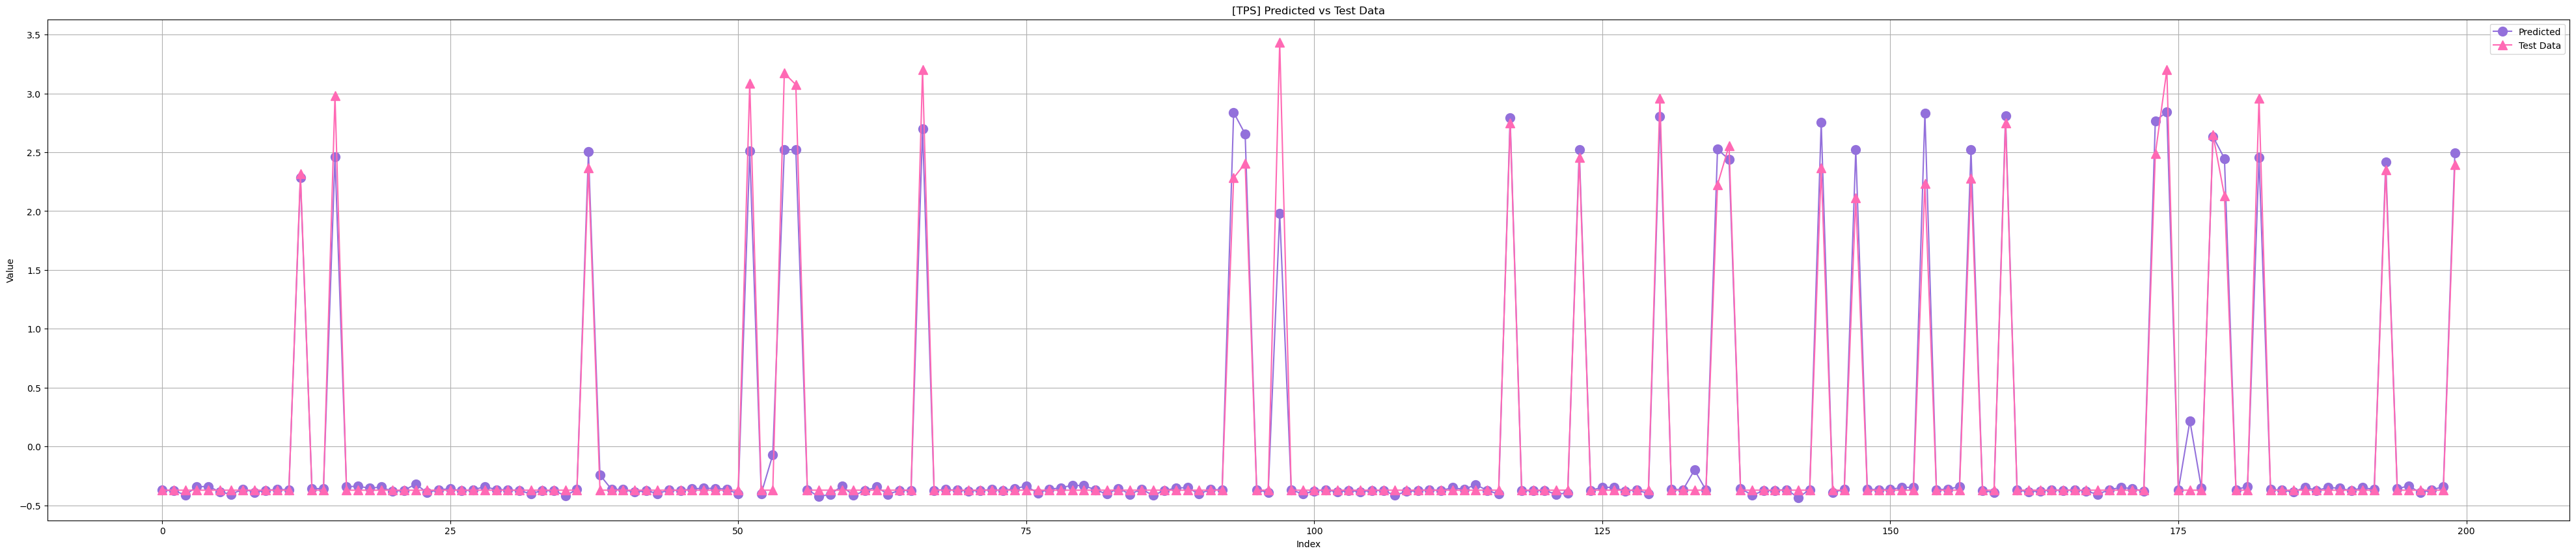

In [134]:
import matplotlib.pyplot as plt

# 예측값과 실제 값 추출
predicted_values = predictions
actual_values = scaled_y_test

# 그래프 그리기
plt.figure(figsize=(50, 10))
plt.plot(predicted_values[:,0], label='Predicted', marker='o',markersize=10, color='mediumpurple')
plt.plot(actual_values[:,0], label='Test Data', marker='^',markersize=10, color='hotpink')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('[TPS] Predicted vs Test Data')
plt.legend()
plt.grid(True)
plt.show()


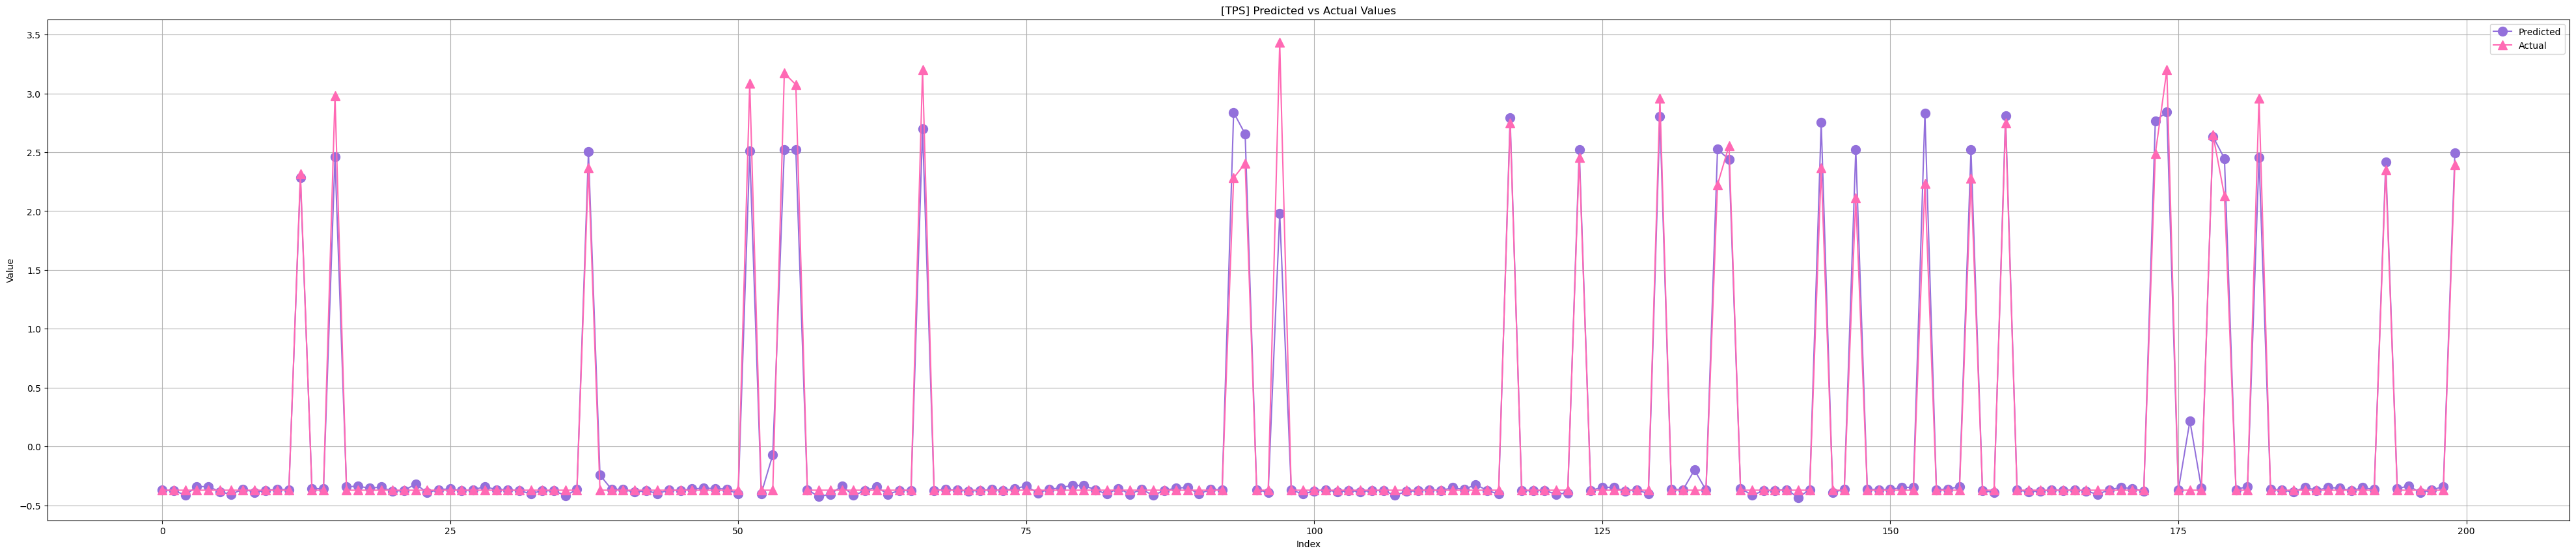

In [22]:
import matplotlib.pyplot as plt

# 예측값과 실제 값 추출
predicted_values = predictions
actual_values = scaled_y_test

# 그래프 그리기
plt.figure(figsize=(50, 10))
plt.plot(predicted_values[:,0], label='Predicted', marker='o',markersize=10, color='mediumpurple')
plt.plot(actual_values[:,0], label='Actual', marker='^',markersize=10, color='hotpink')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('[TPS] Predicted vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()


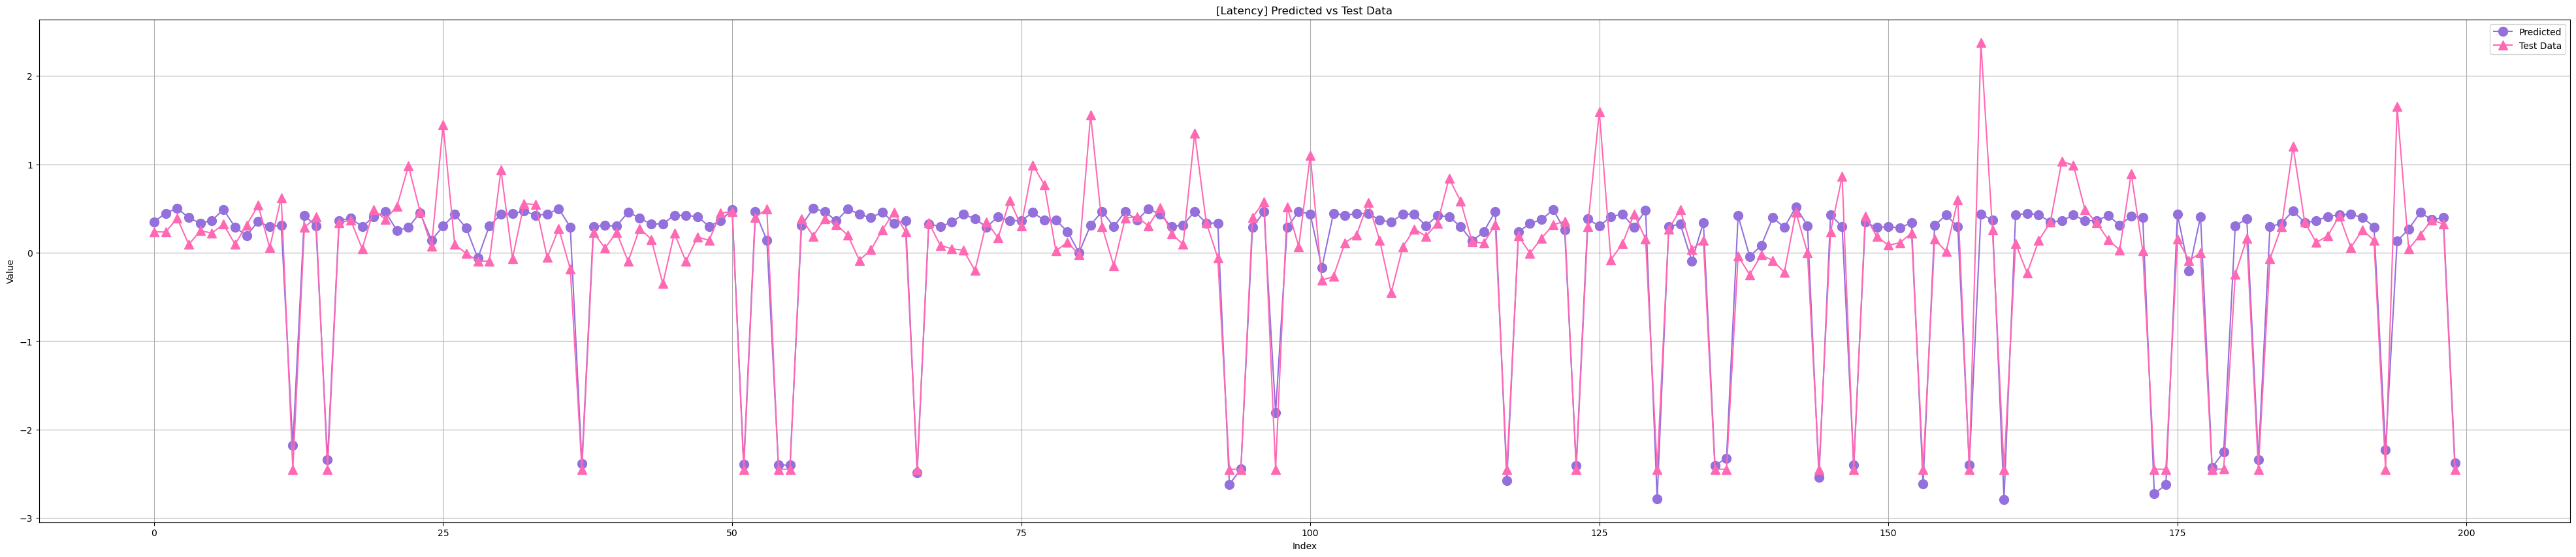

In [135]:
import matplotlib.pyplot as plt

# 예측값과 실제 값 추출
predicted_values = predictions
actual_values = scaled_y_test

# 그래프 그리기
plt.figure(figsize=(50, 10))
plt.plot(predicted_values[:,1], label='Predicted', marker='o',markersize=10, color='mediumpurple')
plt.plot(actual_values[:,1], label='Test Data', marker='^',markersize=10, color='hotpink')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('[Latency] Predicted vs Test Data')
plt.legend()
plt.grid(True)
plt.show()


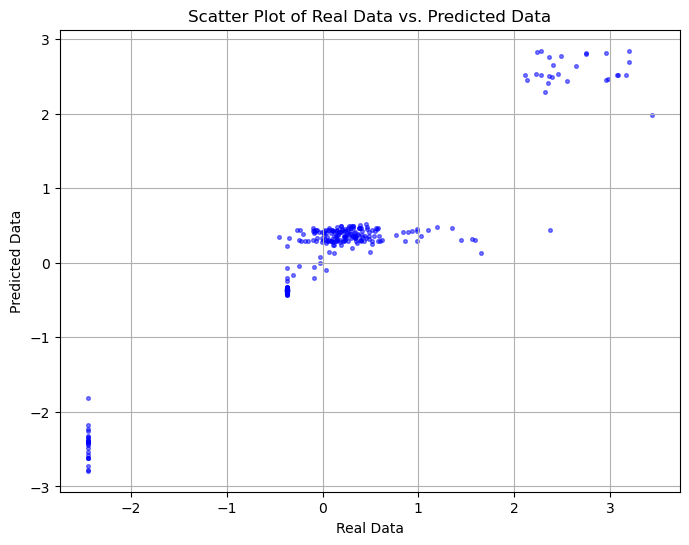

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(scaled_y_test, predictions , color='blue', alpha=0.5, s=7)
plt.xlabel('Real Data')
plt.ylabel('Predicted Data')
plt.title('Scatter Plot of Real Data vs. Predicted Data')
plt.grid(True)
plt.show()

### LHS SAMPLING (make samples #4000)

In [23]:
import pandas as pd

knob_info = pd.read_csv('Knob_Information_MySQL_v5.7.csv')

knob_min = knob_info['raw_min']
knob_max = knob_info['raw_max']


In [24]:
knob_info

,name,type,unit,s_unit,raw_min,d_f_min,raw_max,d_f_max,raw_default,d_f_default,q_factor
0,automatic_sp_privileges,boolean,1,NaN,0,0,1.000000e+00,1,0.0,0.0,1
1,back_log,integer,1,NaN,1,0,6.000000e+04,60,4030.0,4.0,1000
2,binlog_cache_size,integer,1024,KB,4096,0,1.048576e+07,640,32768.0,2.0,16384
3,binlog_group_commit_sync_delay,integer,1,microsecond,0,0,1.000000e+06,200,0.0,0.0,5000
4,binlog_group_commit_sync_no_delay_count,integer,1,NaN,0,0,1.000000e+06,1000,0.0,0.0,1000
...,...,...,...,...,...,...,...,...,...,...,...
133,thread_cache_size,integer,1,NaN,0,0,1.638400e+04,64,-1.0,1.0,256
134,tmp_table_size,integer,1048576,MB,1024,0,1.073742e+09,256,16777216.0,4.0,4194304
135,transaction_alloc_block_size,integer,1024,KB,1024,0,1.310720e+05,32,8192.0,2.0,4096
136,transaction_prealloc_size,integer,1024,KB,1024,0,1.310720e+05,64,4096.0,2.0,2048


In [25]:
from pyDOE import *
from scipy.stats.distributions import uniform

def LH_Sampling(KNOB, KNOB_DETAILS, sample_num):
    maxvals = []
    minvals = []
    types = []
    names = []
    nfeats = len(KNOB)
    
    for knob in range (len(KNOB)):
        names.append(knob)
        knob_info = KNOB_DETAILS
        
        
        if knob_info['type'][knob] == 'boolean':
            maxvals.append(int(1))
            minvals.append(int(0))
        else:
            maxvals.append((knob_info['raw_max'][knob]).astype(int))
            minvals.append((knob_info['raw_min'][knob]).astype(int))
        types.append(knob_info['type'])
        
    
#np.random.seed(72)
    samples = lhs(nfeats, samples=sample_num, criterion='maximin')
    
    maxvals = np.array(maxvals)
    minvals = np.array(minvals)
    scales = maxvals - minvals
    
    for fidx in range(nfeats):
        samples[:, fidx] = uniform(loc=minvals[fidx], scale=scales[fidx]).ppf(samples[:, fidx])
        
    lhs_samples = []
    for sidx in range(sample_num):
        lhs_samples.append(dict())
        for fidx in range(nfeats):
            # lhs_samples[-1][names[fidx]] = int(round(samples[sidx][fidx]))
            lhs_samples[-1][names[fidx]] = int(round(samples[sidx][fidx]))
            # lhs_samples[-1][names[fidx]] = int(round(samples[fidx][sidx]))
            
    random.shuffle(lhs_samples)

    return lhs_samples

A_config_columns = A_config.columns.to_list()
A_config_columns_stripped = [column.strip() for column in A_config_columns]
mm_sample = LH_Sampling(A_config_columns_stripped, knob_info, 4000)


In [26]:

num_data = np.array(mm_sample)

In [ ]:
# from sklearn.manifold import TSNE
# import numpy as np


# # num_data = np.array(mm_sample)
# num_data = np.array([list(data.values()) if isinstance(data, dict) else data for data in mm_sample])
# # t-SNE를 사용하여 2D로 축소
# tsne = TSNE(n_components=2)
# num_data_2d = tsne.fit_transform(num_data)

# # 2차원 산점도를 그리기
# plt.scatter(num_data_2d[:, 0], num_data_2d[:, 1], s=1, alpha=0.5)
# plt.title('t-SNE Visualization of LHS Sampling')
# plt.xlabel('Dimension 0')
# plt.ylabel('Dimension 1')
# plt.show()

In [27]:
sample_list = []
for ll in mm_sample:
    val = list(ll.values())
    sample_list.append(val)
# sample_list = [ll]

In [28]:
samples = sample_list
samples = np.array(samples)

In [30]:
### Predict Metrics with New Samples ()= configs)

from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

new_X = np.array(samples)
# new_X = np.round(new_X)
Z_scaler = MinMaxScaler().fit(new_X)
new_X_ = Z_scaler.transform(new_X)
# print(new_X_)

predictions_new = regressor.predict(new_X_) #scaling O


In [31]:
### new_metrics_re = 원래 metric + predic_metric
### predictions_new == predict_model.predict(new_sample)

predictions_new_df = pd.DataFrame(predictions_new) 


# inverse를 통해서 원래 데이터 형태로
inverse_new_pred_tps = Y_scaler_tps.inverse_transform(predictions_new[:, 0].reshape(-1, 1))
inverse_new_pred_lat = Y_scaler_latecy.inverse_transform(predictions_new[:, 1].reshape(-1, 1))

inverse_new_pred_sum = np.concatenate([inverse_new_pred_tps, inverse_new_pred_lat], axis=1)
inverse_new_pred_pd = pd.DataFrame(inverse_new_pred_sum)
inverse_new_pred_pd.rename(columns={0: "tps", 1:"latency"}, inplace=True)


new_metrics_re = pd.concat([metrics,inverse_new_pred_pd], axis=0)


new_metrics_re = new_metrics_re.reset_index()

In [32]:
new_metrics_re = new_metrics_re.drop(['index'], axis=1)
new_metrics_re

,tps,latency
0,0.216666,2.084740e+07
1,0.322221,1.274494e+07
2,3789.313102,1.076000e+03
3,0.166667,1.251055e+07
4,0.266666,1.068620e+07
...,...,...
4995,-2.620329,1.219032e+07
4996,3438.919434,-7.505314e+05
4997,36.235203,1.206957e+07
4998,-35.095882,1.258795e+07


### 인자 정리
- new_X = samples = LHS Sampling으로 생성한 데이터
<!-- - new_metrics = 생성한 데이터에 대해서 TabNET이 예측한 metrics + 원래 metrics (scaling X) -->
- new_metrics_re = 원래 metric (A_metrics) + 생성한 데이터로 예측한 metric (scaling X)
- new_Samples = 원래 config + 생성한 config (scaling X)
- newnewnew = AutoEncoder에 넣을 수 있는 데이터셋

In [33]:
new_X_pd = pd.DataFrame(new_X)
# new_X_pd = round(new_X_pd).astype(int)
for i in range(len(new_X_pd.columns)):
    new_X_pd.rename(columns={new_X_pd.columns[i]: A_config.columns[i]}, inplace=True)   
    
new_Samples = pd.concat([A_config,new_X_pd] , axis=0)

In [34]:
# pd.options.display.max_rows = 60
# pd.options.display.max_columns = 20

new_Samples = new_Samples.reset_index()
new_Samples = new_Samples.drop(['index'], axis=1)
# new_Samples = new_Samples.round()

### AE Train set에 추가 (1000 + 4000) AUG == new_Samples

In [35]:
newnewwnew = pd.concat([new_Samples, new_metrics_re], axis = 1)

### AutoEncoder (raw data + new data)

In [149]:

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import  TensorDataset, DataLoader

scaler_conf = MinMaxScaler()
scaler_metric = MinMaxScaler()

scaled_samples = scaler_conf.fit_transform(new_Samples)
# tps , latency 따로 scaling
scaled_new_metrics_re_tps = scaler_metric.fit_transform(new_metrics_re['tps'].values.reshape(-1, 1))
scaled_new_metrics_re_lat = scaler_metric.fit_transform(new_metrics_re['latency'].values.reshape(-1, 1))

scaled_new_Samples = np.concatenate([scaled_samples,scaled_new_metrics_re_tps,scaled_new_metrics_re_lat], axis = 1)

# tps , Latency 따로 sclaling하고 합친거
X_train, X_test = train_test_split(scaled_new_Samples, test_size=0.2, shuffle=True)

dataset_tr = TensorDataset(torch.tensor(X_train))
dataset_te = TensorDataset(torch.tensor(X_test))

trainloader = torch.utils.data.DataLoader(dataset_tr, batch_size=256, shuffle=True)
testloader = torch.utils.data.DataLoader(dataset_te, batch_size=256, shuffle=True)


In [36]:

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import  TensorDataset, DataLoader

scaler_conf = MinMaxScaler()
scaler_tps = MinMaxScaler()
scaler_lat = MinMaxScaler()

scaled_samples = scaler_conf.fit_transform(new_Samples)
# tps , latency 따로 scaling
scaled_new_metrics_re_tps = scaler_tps.fit_transform(new_metrics_re['tps'].values.reshape(-1, 1))
scaled_new_metrics_re_lat = scaler_lat.fit_transform(new_metrics_re['latency'].values.reshape(-1, 1))

scaled_new_Samples = np.concatenate([scaled_samples,scaled_new_metrics_re_tps,scaled_new_metrics_re_lat], axis = 1)

# tps , Latency 따로 sclaling하고 합친거
X_train, X_test = train_test_split(scaled_new_Samples, test_size=0.2, shuffle=True)

dataset_tr = TensorDataset(torch.tensor(X_train))
dataset_te = TensorDataset(torch.tensor(X_test))

trainloader = torch.utils.data.DataLoader(dataset_tr, batch_size=256, shuffle=True)
testloader = torch.utils.data.DataLoader(dataset_te, batch_size=256, shuffle=True)


In [37]:
### 원본

import torch.nn as nn

class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = nn.Sequential(
        nn.Linear(140,128),
        nn.ReLU(),
        nn.Dropout(p=0.2),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,32),
        nn.Sigmoid())
    
    self.decoder = nn.Sequential(
        nn.Linear(32,64),
        nn.ReLU(),
        nn.Linear(64,128),
        nn.ReLU(),
        nn.Linear(128, 140), 
        nn.Sigmoid()
    )
  
  #인코더와 디코더 연산을 차례대로 수행하도록 설정 
  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
model_path = '/home/sein/mk_config/240403_mysql_models/autoencoder_wkAA_0416.pt'
# torch.save(model.state_dict(), model_path)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# model =Autoencoder().to(device)
test0_model = Autoencoder().to(device)
load_weight = torch.load(model_path)
test0_model.load_state_dict(load_weight)

ex_scaled_new_Samples = torch.Tensor(scaled_samples).to(device)

with torch.no_grad():
    encoded_vector_BO = test0_model.encoder(ex_scaled_new_Samples)
    print("BO'S Encoded Latent Vector:", encoded_vector_BO)

In [51]:
### 원본

import torch.nn as nn

class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = nn.Sequential(
        nn.Linear(140,128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(p=0.2),
        nn.Linear(128,64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        # nn.Linear(64,64),
        # nn.BatchNorm1d(64),
        # nn.ReLU(),
        nn.Linear(64,32),
        nn.BatchNorm1d(32),
        nn.ReLU(),
        nn.Linear(32,32),

        # nn.Linear(32,16),
        
        nn.Sigmoid())
    
    self.decoder = nn.Sequential(
  
        nn.Linear(32,32),
        nn.BatchNorm1d(32),
        nn.ReLU(),
        nn.Linear(32,64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        # nn.Linear(64,64),
        # nn.BatchNorm1d(64),
        # nn.ReLU(),
        nn.Linear(64,128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Linear(128, 140), 
        nn.Sigmoid()
    )
  
  #인코더와 디코더 연산을 차례대로 수행하도록 설정 
  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [53]:
# from torch import device
from torch import optim
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# model =Autoencoder().to(device)
model = Autoencoder().to(device)
# model = Autoencoder()


critertion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
#lr=1e-4
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
trainloss = []
validationloss = []
epoch_list = []

for epoch in range(25000):
  running_loss = 0
  model.train()
  
  for data in trainloader:
    inputs = data[0].float().to(device)
    optimizer.zero_grad()
    outputs = model(inputs) 
    loss = critertion(inputs, outputs)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  train_loss = running_loss / len(trainloader)
  trainloss.append(train_loss)
  # epoch_list.append(epoch)
  
  if epoch % 300 == 0:
    total_val_loss = 0
    model.eval()
    with torch.no_grad():
      running_loss = 0
      
      for data in testloader:
        inputs = data[0].float().to(device)
        # optimizer.zero_grad()
        outputs = model(inputs) 
        loss = critertion(inputs, outputs)
        running_loss += loss.item()
        inputs_np = inputs.cpu().detach().numpy()
        outputs_np = outputs.cpu().detach().numpy()
      total_val_loss = running_loss / len(testloader)
      validationloss.append(total_val_loss)
        
    print('[%d] tr_loss : %.3f | val_loss : %.3f' %(epoch +1, train_loss, total_val_loss))
    # print('MSE_Loss :', critertion(inputs, outputs) )

[1] tr_loss : 0.130 | val_loss : 0.126
[301] tr_loss : 0.068 | val_loss : 0.073
[601] tr_loss : 0.064 | val_loss : 0.069
[901] tr_loss : 0.062 | val_loss : 0.068
[1201] tr_loss : 0.061 | val_loss : 0.066
[1501] tr_loss : 0.060 | val_loss : 0.065
[1801] tr_loss : 0.060 | val_loss : 0.064
[2101] tr_loss : 0.059 | val_loss : 0.063
[2401] tr_loss : 0.058 | val_loss : 0.062
[2701] tr_loss : 0.057 | val_loss : 0.061
[3001] tr_loss : 0.057 | val_loss : 0.061
[3301] tr_loss : 0.057 | val_loss : 0.060
[3601] tr_loss : 0.056 | val_loss : 0.061
[3901] tr_loss : 0.056 | val_loss : 0.060
[4201] tr_loss : 0.056 | val_loss : 0.060
[4501] tr_loss : 0.056 | val_loss : 0.060
[4801] tr_loss : 0.056 | val_loss : 0.060
[5101] tr_loss : 0.056 | val_loss : 0.060
[5401] tr_loss : 0.055 | val_loss : 0.060
[5701] tr_loss : 0.055 | val_loss : 0.060
[6001] tr_loss : 0.055 | val_loss : 0.060
[6301] tr_loss : 0.055 | val_loss : 0.060
[6601] tr_loss : 0.055 | val_loss : 0.060
[6901] tr_loss : 0.055 | val_loss : 0.06

In [56]:
outputs.shape

torch.Size([32, 140])

In [66]:
X_test.shape

(1000, 140)

### AutoEncoder T-SNE (Reconstruction이 잘 되었는지 확인)

In [54]:
import torch

label_total = torch.tensor(X_test)
recon_total = model(torch.tensor(X_test).to("cuda").float())

label_total_np = label_total.detach().cpu().numpy()
recon_total_np = recon_total.detach().cpu().numpy()

all_concat = np.concatenate([label_total_np,recon_total_np] )
all_concat.shape

(2000, 140)

In [47]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler,StandardScaler


n_components = 2

scaler = MinMaxScaler()
input_array = scaler.fit_transform(inputs_np)


tsne_model = TSNE(n_components=n_components)

r = tsne_model.fit_transform(all_concat)

# print(tsne_model.fit_transform(input_array))

In [45]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# from sklearn.datasets import load_digit
import torch


n_components = 2

tsne_model = TSNE(n_components=n_components)
encoded_vector_BO_np = encoded_vector_BO.detach().cpu().numpy()

# r2 = tsne_model.fit_transform(torch.tensor(synthetic_data).cpu())
#scaler = MinMaxScaler()
#output_array = scaler.fit_transform(outputs_np)
r2 = tsne_model.fit_transform(encoded_vector_BO_np)

 
# print(tsne_model.fit_transform(input_array))

In [ ]:
import matplotlib.pyplot as plt

# t-SNE 결과 시각화
# plt.scatter(r[:2000, 0], r[:2000, 1], s=3, color='red', label='real-data')
# plt.scatter(r[2000:, 0], r[2000:, 1], s=1, alpha=0.3 , color='blue', label='Latent-Space')
plt.scatter(r[:2000, 0], r[:2000, 1], s=3, color='red', label='real-data')
plt.scatter(r2[:2000, 0], r2[:2000, 1], s=3,  color='blue', label='Latent-Space')


plt.title('t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')


plt.legend(loc='upper right')
plt.figure(figsize=(10,10))
plt.show()


In [49]:
label_total_np[:1]
np.round(label_total_np[:1], 3)

array([[1.   , 0.983, 0.886, 0.347, 0.279, 0.   , 0.971, 0.085, 0.857,
        0.167, 0.   , 0.975, 0.857, 0.   , 0.406, 1.   , 0.909, 0.   ,
        0.415, 0.663, 0.283, 0.403, 0.33 , 0.24 , 0.   , 0.425, 0.4  ,
        1.   , 0.547, 0.824, 1.   , 1.   , 1.   , 0.6  , 1.   , 0.165,
        0.   , 0.   , 0.967, 0.   , 0.215, 0.262, 0.097, 0.305, 0.311,
        0.613, 0.669, 0.934, 0.655, 0.788, 0.657, 0.566, 0.316, 0.094,
        0.955, 0.31 , 0.066, 0.311, 0.   , 0.778, 1.   , 0.212, 0.126,
        0.29 , 1.   , 0.688, 0.968, 0.532, 0.   , 0.26 , 0.938, 0.4  ,
        0.   , 0.   , 1.   , 1.   , 0.875, 0.   , 0.603, 0.105, 0.   ,
        0.65 , 0.   , 0.   , 0.   , 0.727, 0.189, 0.994, 0.302, 0.768,
        1.   , 0.   , 1.   , 1.   , 0.389, 0.087, 0.059, 0.409, 0.074,
        0.348, 0.473, 0.087, 0.121, 0.975, 0.554, 0.679, 0.026, 0.524,
        0.767, 0.408, 0.444, 1.   , 0.968, 0.948, 0.295, 0.64 , 0.18 ,
        0.558, 0.   , 0.85 , 0.375, 0.47 , 0.443, 0.   , 0.   , 1.   ,
      

In [50]:
np.round(recon_total_np[:1], 3)

array([[1.   , 0.687, 0.588, 0.575, 0.504, 0.001, 0.668, 0.495, 0.573,
        0.596, 0.   , 0.477, 0.418, 0.   , 0.419, 0.708, 0.384, 0.023,
        0.527, 0.538, 0.463, 0.522, 0.423, 0.713, 0.009, 0.453, 0.357,
        0.727, 0.536, 0.415, 1.   , 1.   , 1.   , 0.413, 0.944, 0.457,
        0.09 , 0.019, 0.335, 0.558, 0.605, 0.391, 0.397, 0.473, 0.736,
        0.531, 0.643, 0.589, 0.636, 0.49 , 0.403, 0.638, 0.481, 0.464,
        0.536, 0.429, 0.548, 0.296, 0.   , 0.622, 0.978, 0.54 , 0.436,
        0.531, 0.937, 0.541, 0.454, 0.591, 0.006, 0.471, 0.411, 0.402,
        0.001, 0.003, 1.   , 0.866, 0.523, 0.   , 0.525, 0.698, 0.   ,
        0.561, 0.013, 0.051, 0.505, 0.622, 0.444, 0.643, 0.408, 0.661,
        1.   , 0.01 , 0.982, 0.999, 0.446, 0.431, 0.382, 0.438, 0.556,
        0.605, 0.471, 0.447, 0.417, 0.517, 0.394, 0.477, 0.548, 0.46 ,
        0.41 , 0.549, 0.537, 0.977, 0.645, 0.496, 0.557, 0.349, 0.42 ,
        0.429, 0.019, 0.651, 0.779, 0.556, 0.524, 0.078, 0.   , 1.   ,
      

### Optimization in latent space (TabNet)
- Prediction

In [138]:

import torch
import pandas as pd
import numpy as np

ex_scaled_new_Samples = torch.Tensor(scaled_new_Samples).to(device)

with torch.no_grad():
    encoded_vector_BO = model.encoder(ex_scaled_new_Samples)
    print("BO'S Encoded Latent Vector:", encoded_vector_BO)

BO'S Encoded Latent Vector: tensor([[0.5961, 0.4805, 0.5872,  ..., 0.5159, 0.4923, 0.7436],
        [0.5220, 0.5067, 0.5648,  ..., 0.4957, 0.4312, 0.7506],
        [0.5114, 0.5234, 0.5847,  ..., 0.4769, 0.4639, 0.7477],
        ...,
        [0.5667, 0.4660, 0.6170,  ..., 0.5134, 0.4458, 0.6570],
        [0.5984, 0.4253, 0.6390,  ..., 0.5276, 0.5117, 0.7265],
        [0.5271, 0.4436, 0.5627,  ..., 0.4460, 0.4709, 0.7587]],
       device='cuda:0')


In [139]:
### TabNet
### X = encoded_vector_BO (Scaling O) , Y = metrics (Scaling X)

from pytorch_tabnet.tab_model import TabNetRegressor
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_latent = np.array(encoded_vector_BO.cpu().numpy())
Y_latent = np.array(new_metrics_re)

lt_X_train, lt_X_test, lt_y_train, lt_y_test = train_test_split(X_latent,Y_latent,test_size=0.2, shuffle=True)


y_train_tps = lt_y_train[:,0][:, np.newaxis]
y_train_latecy = lt_y_train[:,1][:, np.newaxis]
y_test_tps = lt_y_test[:,0][:, np.newaxis]
y_test_latecy = lt_y_test[:,1][:, np.newaxis]


Y_scaler_tps  = MinMaxScaler().fit(y_train_tps)
Y_scaler_latecy = MinMaxScaler().fit(y_train_latecy)


scaled_lt_y_train_tps = Y_scaler_tps.transform(y_train_tps)
scaled_lt_y_train_latency = Y_scaler_latecy.transform(y_train_latecy)


scaled_lt_y_test_tps = Y_scaler_tps.transform(y_test_tps)
scaled_lt_y_test_latency = Y_scaler_latecy.transform(y_test_latecy)


scaled_lt_y_train = np.concatenate([scaled_lt_y_train_tps, scaled_lt_y_train_latency], axis = 1)
scaled_lt_y_test = np.concatenate([scaled_lt_y_test_tps, scaled_lt_y_test_latency], axis = 1)

# Tabnet 모델 생성
lt_regressor = TabNetRegressor(verbose = 10,seed = 42,optimizer_fn=torch.optim.AdamW) 
    
# 모델 학습
lt_regressor.fit(X_train=lt_X_train, y_train=scaled_lt_y_train,
              eval_set=[(lt_X_test, scaled_lt_y_test)],
              patience=500, 
              batch_size = 516,
              max_epochs=10000,
              eval_metric=['mse'])

# 테스트 데이터로 예측
lt_predictions = lt_regressor.predict(lt_X_test)

# 성능 평가
print('BEST VALID SCORE : ', lt_regressor.best_cost)
print('R2 SCORE : ' , r2_score(scaled_lt_y_test, lt_predictions))





epoch 0  | loss: 0.39597 | val_0_mse: 0.10856 |  0:00:00s
epoch 10 | loss: 0.04389 | val_0_mse: 0.04498 |  0:00:01s
epoch 20 | loss: 0.04424 | val_0_mse: 0.04478 |  0:00:03s
epoch 30 | loss: 0.04185 | val_0_mse: 0.04648 |  0:00:05s
epoch 40 | loss: 0.04018 | val_0_mse: 0.04709 |  0:00:06s
epoch 50 | loss: 0.03665 | val_0_mse: 0.04817 |  0:00:08s
epoch 60 | loss: 0.03618 | val_0_mse: 0.04414 |  0:00:10s
epoch 70 | loss: 0.03141 | val_0_mse: 0.04447 |  0:00:11s
epoch 80 | loss: 0.02252 | val_0_mse: 0.03099 |  0:00:13s
epoch 90 | loss: 0.01568 | val_0_mse: 0.02459 |  0:00:15s
epoch 100| loss: 0.01154 | val_0_mse: 0.01611 |  0:00:16s
epoch 110| loss: 0.00942 | val_0_mse: 0.01502 |  0:00:18s
epoch 120| loss: 0.00593 | val_0_mse: 0.00751 |  0:00:20s
epoch 130| loss: 0.00399 | val_0_mse: 0.00461 |  0:00:21s
epoch 140| loss: 0.00357 | val_0_mse: 0.00309 |  0:00:23s
epoch 150| loss: 0.00293 | val_0_mse: 0.00233 |  0:00:25s
epoch 160| loss: 0.00297 | val_0_mse: 0.0023  |  0:00:26s
epoch 170| los

In [140]:
print(r2_score(scaled_lt_y_test[:,0], lt_predictions[:,0]))
print(r2_score(scaled_lt_y_test[:,1], lt_predictions[:,1]))


0.9894430502520647
0.9389409199390805


In [84]:
saving_path_name = "/home/sein/mk_config/240403_mysql_models/tabnet_model_wkAA_0416"
saved_filepath = lt_regressor.save_model(saving_path_name)


# regressor.load_model(saving_path_name)

Successfully saved model at /home/sein/mk_config/240403_mysql_models/tabnet_model_wkAA_0416.zip


In [86]:
saving_path_name = "/home/sein/mk_config/240403_mysql_models/lhs_tabnet_model_wkAA_0416"
saved_filepath = regressor.save_model(saving_path_name)


# regressor.load_model(saving_path_name)

Successfully saved model at /home/sein/mk_config/240403_mysql_models/lhs_tabnet_model_wkAA_0416.zip


In [88]:
mm_sample_df = pd.DataFrame(mm_sample)
mm_sample_df.to_csv('/home/sein/mk_config/240403_mysql_models/lhs_config.csv')

In [83]:
model_path = '/home/sein/mk_config/240403_mysql_models/autoencoder_wkAA_0416.pt'
torch.save(model.state_dict(), model_path)
# fuck_model = Autoencoder().to('cuda')
# load_weight = torch.load(model_path)
# fuck_model.load_state_dict(load_weight)

# with torch.no_grad():
#     fuck_model.eval()
#     fuck_model.decoder(ex_data.to('cuda'))

In [ ]:
# from pytorch_tabnet.tab_model import TabNetRegressor
# from sklearn.model_selection import KFold
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import r2_score
# import numpy as np

# # K-Fold 설정
# kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# # 전체 데이터 준비
# X_latent = np.array(encoded_vector_BO.cpu().numpy())
# Y_latent = np.array(new_metrics_re)

# # MinMaxScaler 초기화
# Y_scaler_tps = MinMaxScaler()
# Y_scaler_latecy = MinMaxScaler()

# cv_accuracy = []

# # K-Fold 교차 검증 반복
# for train_idx, test_idx in kfold.split(X_latent):
#     # 훈련 데이터 및 테스트 데이터 분할
#     X_train, X_test = X_latent[train_idx], X_latent[test_idx]
#     y_train, y_test = Y_latent[train_idx], Y_latent[test_idx]

#     # 타겟 변수 스케일링
#     y_train_tps = y_train[:, 0][:, np.newaxis]
#     y_train_latecy = y_train[:, 1][:, np.newaxis]
#     y_test_tps = y_test[:, 0][:, np.newaxis]
#     y_test_latecy = y_test[:, 1][:, np.newaxis]

#     scaled_y_train_tps = Y_scaler_tps.fit_transform(y_train_tps)
#     scaled_y_train_latency = Y_scaler_latecy.fit_transform(y_train_latecy)

#     scaled_y_test_tps = Y_scaler_tps.transform(y_test_tps)
#     scaled_y_test_latency = Y_scaler_latecy.transform(y_test_latecy)

#     scaled_y_train = np.concatenate([scaled_y_train_tps, scaled_y_train_latency], axis=1)
#     scaled_y_test = np.concatenate([scaled_y_test_tps, scaled_y_test_latency], axis=1)

#     # Tabnet 모델 생성
#     lt_regressor = TabNetRegressor(verbose=20, seed=42, optimizer_fn=torch.optim.AdamW)

#     # 모델 학습
#     lt_regressor.fit(X_train=X_train, y_train=scaled_y_train,
#                      eval_set=[(X_test, scaled_y_test)],
#                      patience=500,
#                      batch_size=128,
#                      max_epochs=10000,
#                      eval_metric=['mse'])

#     # 테스트 데이터로 예측
#     lt_predictions = lt_regressor.predict(X_test)

#     cv_accuracy.append(r2_score(scaled_y_test, lt_predictions))
#     # 성능 평가
#     # print('BEST VALID SCORE: ', lt_regressor.best_cost)
#     # print('R2 SCORE: ', r2_score(scaled_y_test, lt_predictions))
    
# print('R2_SCORE MEAN: ', np.mean(cv_accuracy))


In [60]:
latent_pd = pd.DataFrame(encoded_vector_BO.cpu().numpy())
latent_pd_T = latent_pd.T
# latent_pd_T.index

In [132]:
### BO 코드
from sklearn.preprocessing import MinMaxScaler
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction

class BO(object):
    def __init__(self, iteration, configs, metrics, regressor,config_info_path=None,):
        self.iteration = iteration
        self.configs = configs
        self.metrics = metrics
        self.config_info_path = config_info_path
        # self.min_max_same_knobs = []
        self.regressor = regressor
        self._get_config_info()
        self._init_pbounds()
    
    def _get_config_info(self):
        if self.config_info_path is None:
            self.config_info = pd.read_csv('/home/sein/mk_config/Knob_Information_MySQL_v5.7.csv', index_col=0)
        else:
            self.config_info = pd.read_csv(self.config_info_path, index_col=0)
        
        # if self.top_z_knob is not None:
        #     self.config_info = self.config_info.loc[self.top_z_knob]
        #     self.configs = self.configs[self.top_z_knob]
            

#     def _get_history(self):
#         self.history_configs = self.smac.runhistory.get_configs()
    
    def _init_pbounds(self):
        self.pbounds = {}
        
        for v in latent_pd_T.index:
            self.pbounds[str(v)] = (0, 1)
            
    
   
    
    def _target_function(self, **kwargs):
        x = np.fromiter(kwargs.values(), dtype=float)        
        # scaled_X = self.X_scaler.transform([x])
        x = x.reshape(1, -1)

        res = self.regressor.predict(x)
        res = res[:,0] / res[:,1]

        
        return res.squeeze()
        # return res
    
    
    def tune(self):
        self.optimizer = BayesianOptimization(f=self._target_function, pbounds=self.pbounds, verbose=2, random_state=2)

        self.acquisition_function = UtilityFunction(kind="ei", kappa=2.5, xi=0.001)
        
        #init_points를 높게해서
        self.optimizer.maximize(n_iter=self.iteration, init_points=150, acquisition_function=self.acquisition_function)
    

### Bayesian Optimization

In [131]:
# tuner1 = BO(iteration=500, 
#            configs=encoded_vector_BO.cpu().numpy(),
#            metrics=new_metrics_re
#            )
# tuner1.train_regression_model()
# tuner1.tune()
# # tuner1.plot_history()

tuner1 = BO(iteration=1000, 
           configs=encoded_vector_BO.cpu().numpy(),
           metrics=new_metrics_re,
           regressor=lt_regressor
           )
# tuner1.train_regression_model()
tuner1.tune()
# tuner1.plot_history()

|   iter    |  target   |     0     |     1     |    10     |    11     |    12     |    13     |    14     |    15     |    16     |    17     |    18     |    19     |     2     |    20     |    21     |    22     |    23     |    24     |    25     |    26     |    27     |    28     |    29     |     3     |    30     |    31     |     4     |     5     |     6     |     7     |     8     |     9     |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| 1         | -1.901    | 0.436     | 0.02593   | 0.5497    | 0.4353    | 0.4204    | 0.3303    | 0.2046    | 0.6193    | 0.2997    | 0.2668    | 0.6211    | 0.5291    | 0.1346    

In [50]:
ex_data =[0.2674, 0.3304, 0.6424, 0.09704, 0.8512, 0.8459, 0.4732, 0.4474, 0.8108,
          0.9238, 0.3662, 0.1817, 0.6052, 0.9395, 0.7801, 0.5615, 0.4154, 0.8053,
          0.9147, 0.009781, 0.09562, 0.006069, 0.5733, 0.5874, 0.9629, 0.8225,
          0.665, 0.8474, 0.6895, 0.9567, 0.2566, 0.1469]

In [186]:
#WKAA
ex_data = [0.6589    , 0.5027    , 0.1772    , 0.8412    , 0.598     , 0.2432    , 0.007372  , 0.4775    , 0.0       , 1.0       , 0.5331    , 1.0       , 0.293     , 0.3962    , 0.6545    , 1.0       , 0.01211   , 0.3802    , 0.0       , 0.9698    , 0.8618    , 0.4498    , 0.7405    , 0.6345    , 0.7021    , 0.9893    , 0.8988    , 0.2669    , 0.6585    , 1.0       , 0.2831    , 0.2523    ]

In [202]:
ex_data = [ 0.0       , 0.6461    , 0.9547    , 0.0       , 0.5861    , 0.08383   , 1.0       , 0.1367    , 1.0       , 0.0       , 0.9762    , 0.0       , 0.0       , 1.0       , 0.5297    , 0.0       , 1.0       , 1.0       , 0.1229    , 0.4816    , 0.0       , 0.0       , 1.0       , 1.0       , 1.0       , 0.3795    , 1.0       , 1.0       , 0.0       , 1.0       , 0.6391    , 0.2596    ]

In [211]:
ex_data = [0.0       , 0.7436    , 0.05715   , 1.0       , 0.5094    , 0.066     , 0.9522    , 0.952     , 0.0       , 0.8603    , 1.0       , 0.0       , 0.07395   , 0.0       , 1.0       , 0.04443   , 1.0       , 0.9048    , 0.0       , 1.0       , 1.0       , 0.0       , 1.0       , 1.0       , 0.02656   , 0.9539    , 1.0       , 0.0       , 1.0       , 1.0       , 0.2033    , 0.0443    ]

In [122]:
ex_data = [ 0.9975    , 0.5086    , 0.4999    , 0.5755    , 0.689     , 0.9499    , 0.6948    , 0.7895    , 0.2272    , 0.4715    , 0.7773    , 0.3863    , 0.851     , 0.7488    , 0.3754    , 0.8756    , 0.6344    , 0.06885   , 0.9193    , 0.4603    , 0.3187    , 0.1428    , 0.1469    , 0.2167    , 0.969     , 0.02778   , 0.2407    , 0.04691   , 0.8317    , 0.8748    , 0.7504    , 0.9371   ]

In [91]:
ex_data = [0.5323    , 0.3769    , 0.749     , 0.7408    , 0.6625    , 0.3864    , 0.249     , 0.2081    , 0.005864  , 0.06209   , 0.8747    , 0.2086    , 0.2512    , 0.06677   , 0.1459    , 0.3481    , 0.5509    , 0.9349    , 0.2552    , 0.1475    , 0.5918    , 0.4382    , 0.0213    , 0.2948    , 0.7009    , 0.8355    , 0.6325    , 0.3716    , 0.7016    , 0.9565    , 0.6516    , 0.8542  ]

In [101]:
ex_data = [0.9975    , 0.5086    , 0.4999    , 0.5755    , 0.689     , 0.9499    , 0.6948    , 0.7895    , 0.2272    , 0.4715    , 0.7773    , 0.3863    , 0.851     , 0.7488    , 0.3754    , 0.8756    , 0.6344    , 0.06885   , 0.9193    , 0.4603    , 0.3187    , 0.1428    , 0.1469    , 0.2167    , 0.969     , 0.02778   , 0.2407    , 0.04691   , 0.8317    , 0.8748    , 0.7504    , 0.9371   ]

In [111]:
ex_data = [0.1898    , 0.8735    , 0.1469    , 0.4223    , 0.4871    , 0.1905    , 0.4309    , 0.04852   , 0.03861   , 0.02975   , 0.05669   , 0.8725    , 0.9688    , 0.3705    , 0.48      , 0.9568    , 0.8275    , 0.06144   , 0.3929    , 0.4533    , 0.01635   , 0.2895    , 0.46      , 0.2744    , 0.749     , 0.3217    , 0.2236    , 0.1116    , 0.1489    , 0.4973    , 0.9013    , 0.6978  ]

In [212]:
len(ex_data)

32

In [123]:
# Decoding to real dimension

ex_data = torch.tensor(ex_data).unsqueeze(0)
ex_data = ex_data.to('cuda:0')  # ex_data를 GPU로 이동

with torch.no_grad():
    model.eval()
    decode_value = model.decoder(ex_data)
    print("Decoded Value:", decode_value)

Decoded Value: tensor([[3.7413e-06, 8.4620e-01, 5.8084e-01, 5.9696e-01, 4.2499e-01, 2.6545e-03,
         2.1802e-01, 1.6252e-02, 9.4153e-01, 3.6980e-02, 7.8347e-22, 8.3471e-01,
         7.8462e-01, 1.0000e+00, 9.9034e-01, 9.9453e-01, 2.2623e-02, 1.2638e-19,
         8.7247e-01, 3.9614e-01, 5.5523e-01, 6.4900e-02, 5.7069e-01, 9.8196e-01,
         9.9484e-01, 9.8004e-01, 9.6452e-01, 9.2598e-01, 5.5085e-02, 1.9164e-01,
         4.6567e-02, 2.6456e-10, 3.9722e-09, 5.8136e-01, 5.2423e-02, 4.4283e-01,
         9.9998e-01, 1.8429e-01, 6.8811e-01, 9.7872e-01, 9.7816e-01, 2.0235e-01,
         7.4541e-02, 9.2789e-01, 1.6250e-01, 2.6885e-01, 5.8425e-01, 9.2258e-01,
         2.2325e-02, 6.2888e-01, 3.4185e-02, 1.0440e-01, 2.8577e-01, 9.8327e-01,
         9.9739e-01, 4.1246e-01, 2.2293e-01, 3.0203e-01, 3.4625e-28, 2.9410e-01,
         1.0000e+00, 1.0437e-02, 8.6644e-01, 2.1069e-01, 9.8281e-01, 3.3845e-01,
         9.9581e-01, 1.1126e-01, 1.0000e+00, 2.6164e-01, 1.8381e-04, 8.1802e-01,
         1.41

In [124]:
converted_values = [float(value) for value in decode_value[0]]


In [125]:
df_converted_values = pd.DataFrame(converted_values)

real_bo_config = df_converted_values[:138] 
real_v = np.array(real_bo_config)

rescaled_bo_config = scaler_conf.inverse_transform(real_v.reshape(1,-1))



In [126]:
real_bo_config

,0
0,0.000003741
1,0.846197188
2,0.580841184
3,0.596961558
4,0.424985468
...,...
133,0.657133579
134,0.096352570
135,0.952311158
136,0.322338939


In [127]:
pd.options.display.float_format = '{:.9f}'.format #지수함수 없이 출력하는 option

rescaled_actual_pd = pd.DataFrame(rescaled_bo_config)
rescaled_actual_pd

,0,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,0.000003741,50771.985076845,6092278.124511719,596961.557865143,425007.318939805,0.002654537,2289360.157348633,17450978.000000000,6.590742052,1.109400429,...,138094.913508326,848965.942859650,1934.752005339,9972.685922980,5.483447753,10766.476562500,103458709.334968567,124870.161499023,42943.534301758,0.187310174


In [128]:
for i in range (len(A_config.columns)):
    print('{} = {}'.format(A_config.columns[i], round(rescaled_actual_pd.iloc[0][i])))

automatic_sp_privileges  = 0
back_log  = 50772
binlog_cache_size  = 6092278
binlog_group_commit_sync_delay  = 596962
binlog_group_commit_sync_no_delay_count  = 425007
binlog_rows_query_log_events  = 0
binlog_stmt_cache_size  = 2289360
bulk_insert_buffer_size  = 17450978
default_week_format  = 7
div_precision_increment  = 1
end_markers_in_json  = 0
eq_range_index_dive_limit  = 8347
expire_logs_days  = 5
explicit_defaults_for_timestamp  = 1
flush_time  = 178
ft_min_word_len  = 16
ft_query_expansion_limit  = 23
general_log  = 0
group_concat_max_len  = 3574
innodb_adaptive_hash_index_parts  = 203
innodb_adaptive_max_sleep_delay  = 555229
innodb_autoextend_increment  = 66
innodb_buffer_pool_size  = 10265368384
innodb_change_buffer_max_size  = 49
innodb_cmp_per_index_enabled  = 1
innodb_commit_concurrency  = 980
innodb_compression_failure_threshold_pct  = 96
innodb_compression_level  = 8
innodb_compression_pad_pct_max  = 4
innodb_concurrency_tickets  = 19165
innodb_deadlock_detect  = 0
innod

In [108]:
# 결과를 저장할 파일 경로 설정
file_path = '/home/sein/mk_config/240403_mysql_models/WKAA_03.txt'

# 파일 열기
with open(file_path, 'w') as file:
    # 각 열의 이름과 결과를 파일에 쓰기
    for i in range(len(A_config.columns)):
        file.write('{} = {}\n'.format(A_config.columns[i], round(rescaled_actual_pd.iloc[0][i])))

